In [44]:
from tratamento_module import *
from modelos_module import *
import numpy as np
import pandas as pd
import warnings
import importlib
from IPython.lib.deepreload import reload
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics

warnings.filterwarnings("ignore")

In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Importação das amostras


In [46]:
tratamento = Tratamento()
amostras = tratamento.amostras_import()
amostras = tratamento.get_frequencies_from(amostras,900)
X,y = tratamento.get_samples(amostras = amostras)

## Divisão dos Conjuntos de Treino e Teste

In [47]:
X_train,X_test,y_train,y_test = tratamento.training_test(X,y)

X_train_under, y_train_under = tratamento.under_sample(X_train=X_train,y_train=y_train,sampling_strategey=1/2)
X_train_over, y_train_over = tratamento.over_sample(X_train=X_train_under,y_train=y_train_under)



## Savitzky e PCA

In [48]:
X_train_s_u = savgol_filter(x=X_train_under,window_length=11,polyorder=5,deriv=1)
X_train_s_o = savgol_filter(x=X_train_over,window_length=11,polyorder=5,deriv=1)
X_test_s = savgol_filter(x=X_test,window_length=11,polyorder=5,deriv=1)

pca_u = tratamento.PCA_t(X_train=X_train_under,n_components=4)
pca_o = tratamento.PCA_t(X_train=X_train_over,n_components=4)

X_train_p_u = pca_u.transform(X_train_under)
X_train_p_o = pca_o.transform(X_train_over)
X_test_p_u = pca_u.transform(X_test)
X_test_p_o = pca_o.transform(X_test)



In [49]:
from copy import deepcopy
tratamento_sav = deepcopy(tratamento)
#X_train_s,X_test_s,y_train_s,y_test_s = tratamento_sav.training_test(X=x_sav,y=tratamento.y)

In [50]:
X_train_over,X_val_over,y_train,y_val=train_test_split(X_train_over,y_train_over,test_size=0.1, random_state = 25)

## Modelos Savitzky

In [51]:
model_sav_u = Modelos(X_train=X_train_s_u,y_train=y_train_under)
model_sav_o = Modelos(X_train=X_train_s_o,y_train=y_train_over)

Grid  NN

In [52]:
grid_nn_sav_u = model_sav_u.grid_nn()
grid_nn_sav_o = model_sav_o.grid_nn()



In [53]:
acc_u=  []
for i in range(len(grid_nn_sav_u)):
    acc_u.append(grid_nn_sav_u[i].evaluate(X_train_s_u,y_train_under))


111/111 [==============================] - 0s 2ms/sample - loss: 0.3947 - acc: 0.8378


In [54]:
acc_o=  []
for i in range(len(grid_nn_sav_o)):
    acc_u.append(grid_nn_sav_o[i].evaluate(X_train_s_o,y_train_over))

148/148 [==============================] - 0s 1ms/sample - loss: 0.3454 - acc: 0.8243


In [79]:
fpr_nn_s_o,tpr_nn_sav_o,threshholds_nn_s_o,auc_nn_s_o = tratamento.roc(y_train_over.to_numpy().astype(int),grid_nn_sav_o[3].predict(X_train_s_o),estimator_name='NN sav')

In [80]:
fpr_nn_s_o

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01351351,
       0.01351351, 0.01351351, 0.02702703, 0.02702703, 0.02702703,
       0.02702703, 0.02702703, 0.02702703, 0.02702703, 0.02702703,
       0.02702703, 0.02702703, 0.02702703, 0.02702703, 0.02702703,
       0.05405405, 0.05405405, 0.06756757, 0.06756757, 0.13513514,
       0.13513514, 0.14864865, 0.14864865, 0.22972973, 0.22972973,
       0.27027027, 0.27027027, 0.28378378, 0.28378378, 0.40540541,
       0.40540541, 0.56756757, 0.56756757, 1.        ])

In [81]:
tpr_nn_sav_o

array([0.        , 0.01351351, 0.06756757, 0.08108108, 0.12162162,
       0.14864865, 0.16216216, 0.24324324, 0.27027027, 0.27027027,
       0.28378378, 0.36486486, 0.36486486, 0.40540541, 0.47297297,
       0.5       , 0.55405405, 0.59459459, 0.62162162, 0.66216216,
       0.67567568, 0.7027027 , 0.74324324, 0.75675676, 0.81081081,
       0.81081081, 0.82432432, 0.82432432, 0.86486486, 0.86486486,
       0.89189189, 0.89189189, 0.91891892, 0.91891892, 0.94594595,
       0.94594595, 0.95945946, 0.95945946, 0.97297297, 0.97297297,
       0.98648649, 0.98648649, 1.        , 1.        ])

In [95]:
th_nn_sav_o = np.where(np.isclose(tpr_nn_sav_o,0.91891892))
print(th_nn_sav_o)
print(fpr_nn_s_o[th_nn_sav_o[0][0]])

(array([32, 33], dtype=int64),)
0.14864864864864866


In [88]:
threshholds_nn_s_o[th_nn_sav_o[0][0]]

0.3749269

In [129]:
y_pred  = grid_nn_sav_o[5].predict(X_test_s)
y_pred_aft_s_o =  np.where(y_pred  > threshholds_nn_s_o[th_nn_sav_o[0][0]], 1, 0)

In [92]:
fpr_nn_s_u,tpr_nn_sav_u,threshholds_nn_s_u,auc_nn_s_u = tratamento.roc(y_train_under.to_numpy().astype(int),grid_nn_sav_u[4].predict(X_train_s_u),estimator_name='NN sav')

In [102]:
th_nn_sav_u = np.where(np.isclose(tpr_nn_sav_u,0.91891892))
print(th_nn_sav_u)
print(fpr_nn_p_u[th_nn_sav_u[0][0]])
print(threshholds_nn_p_u[th_nn_sav_u[0][0]])

(array([20, 21], dtype=int64),)
0.40540540540540543
0.2272806


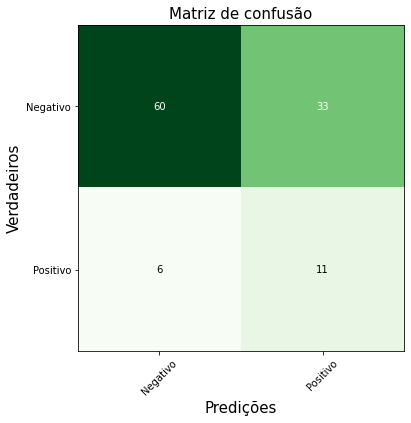

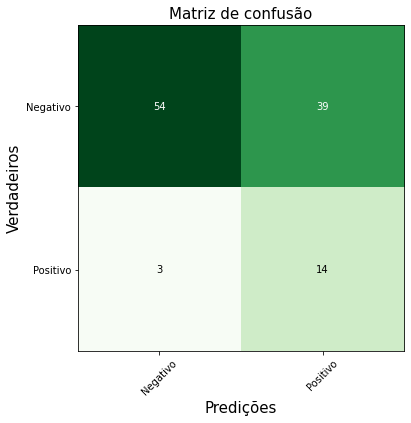

In [130]:
y_pred  = grid_nn_sav_o[3].predict(X_test_s)
y_pred_aft_p_u =  np.where(y_pred  > threshholds_nn_s_u[th_nn_sav_u[0][0]], 1, 0)

tratamento.confusion(y_true=y_test.astype(int),y_predict=y_pred_aft_s_o, fig_name='RNASGU')
tratamento.confusion(y_true=y_test.astype(int),y_predict=y_pred_aft_s_u, fig_name='RNASGO')

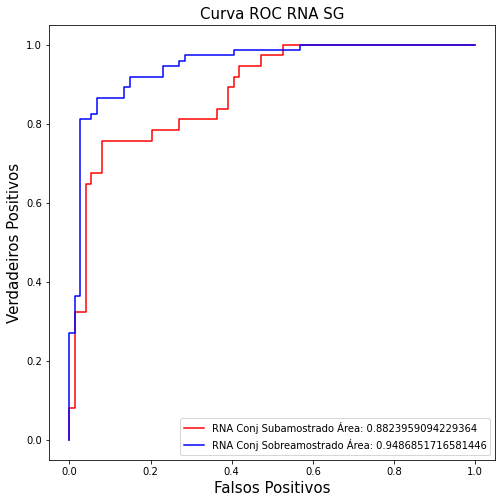

In [128]:
tratamento.plot_roc(tpr=[tpr_nn_sav_u,tpr_nn_sav_o]
,fpr = [fpr_nn_s_u,fpr_nn_s_o],
Names=["RNA Conj Subamostrado","RNA Conj Sobreamostrado"],auc=[auc_nn_s_u,auc_nn_s_o],
name_curve="SG")

In [107]:
print('RNA SG UNDER')
print(sklearn.metrics.accuracy_score(y_true=y_test.astype(int), y_pred=y_pred_aft_s_u))
print(sklearn.metrics.precision_score(y_true=y_test.astype(int), y_pred=y_pred_aft_s_u))
print(sklearn.metrics.recall_score(y_true=y_test.astype(int), y_pred=y_pred_aft_s_u))
print(sklearn.metrics.f1_score(y_true=y_test.astype(int), y_pred=y_pred_aft_s_u))
print('RNA SG OVER')
print(sklearn.metrics.accuracy_score(y_true=y_test.astype(int), y_pred=y_pred_aft_s_o))
print(sklearn.metrics.precision_score(y_true=y_test.astype(int), y_pred=y_pred_aft_s_o))
print(sklearn.metrics.recall_score(y_true=y_test.astype(int), y_pred=y_pred_aft_s_o))
print(sklearn.metrics.f1_score(y_true=y_test.astype(int), y_pred=y_pred_aft_s_o))

RNA SG UNDER
0.6454545454545455
0.25
0.6470588235294118
0.36065573770491804
RNA SG OVER
0.6181818181818182
0.2641509433962264
0.8235294117647058
0.4


In [66]:
svm_s_u = model_sav_u.SVM_GRID()
svm_s_o = model_sav_o.SVM_GRID()

In [67]:
print(svm_s_u.best_score_)
print(svm_s_o.best_score_)

0.6667984189723319
0.7160919540229885


In [68]:
print(svm_s_u.best_params_)
print(svm_s_o.best_params_)

{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [69]:
print('SVM SG UNDER')
print(sklearn.metrics.accuracy_score(y_true=y_test, y_pred=svm_s_u.best_estimator_.predict(X_test_s)))
print(sklearn.metrics.precision_score(y_true=y_test, y_pred=svm_s_u.best_estimator_.predict(X_test_s),pos_label='1'))
print(sklearn.metrics.recall_score(y_true=y_test, y_pred=svm_s_u.best_estimator_.predict(X_test_s),pos_label='1'))
print(sklearn.metrics.f1_score(y_true=y_test, y_pred=svm_s_u.best_estimator_.predict(X_test_s),pos_label='1'))
print('SVM SG OVER')
print(sklearn.metrics.accuracy_score(y_true=y_test, y_pred=svm_s_o.best_estimator_.predict(X_test_s)))
print(sklearn.metrics.precision_score(y_true=y_test, y_pred=svm_s_o.best_estimator_.predict(X_test_s),pos_label='1'))
print(sklearn.metrics.recall_score(y_true=y_test, y_pred=svm_s_o.best_estimator_.predict(X_test_s),pos_label='1'))
print(sklearn.metrics.f1_score(y_true=y_test, y_pred=svm_s_o.best_estimator_.predict(X_test_s),pos_label='1'))

SVM SG UNDER
0.8454545454545455
0.0
0.0
0.0
SVM SG OVER
0.6181818181818182
0.2549019607843137
0.7647058823529411
0.38235294117647056


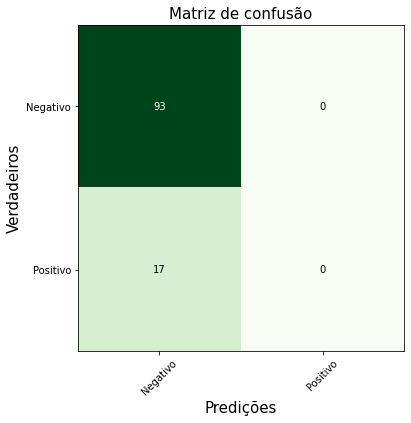

In [70]:
tratamento.confusion(y_true=y_test,y_predict=svm_s_u.best_estimator_.predict(X_test_s),fig_name="SVM_S_U")

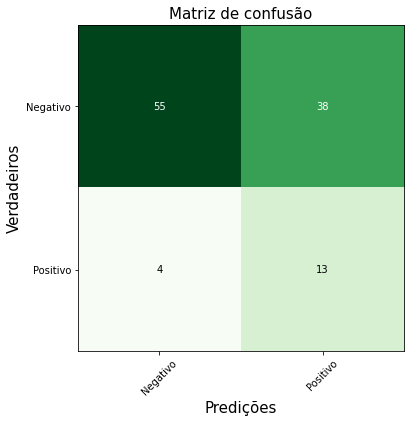

In [71]:
tratamento.confusion(y_true=y_test,y_predict=svm_s_o.predict(X_test_s),fig_name="SVM_S_O")

In [72]:
model_pca_o = Modelos(X_train=X_train_p_o,y_train=y_train_over)
model_pca_u = Modelos(X_train=X_train_p_u,y_train=y_train_under)

In [73]:
grid_nn_pca_u = model_pca_o.grid_nn()
grid_nn_pca_o = model_pca_u.grid_nn()

In [74]:
acc_p_u =   []
for i in range(len(grid_nn_pca_u)):
    acc_p_u.append(grid_nn_pca_u[i].evaluate(X_train_p_u,y_train_under))



111/111 [==============================] - 0s 2ms/sample - loss: 0.2344 - acc: 0.8829


In [75]:
acc_p_o=  []
for i in range(len(grid_nn_pca_o)):
    acc_p_o.append(grid_nn_pca_o[i].evaluate(X_train_p_o,y_train_over))

148/148 [==============================] - 0s 2ms/sample - loss: 0.2994 - acc: 0.8649


In [136]:
fpr_nn_p_o,tpr_nn_p_o,threshholds_nn_p_o,auc_nn_p_o = tratamento.roc(y = 
y_train_over.astype(int),pred = grid_nn_pca_o[4].predict(X_train_p_o))

In [137]:
fpr_nn_p_u,tpr_nn_p_u,threshholds_nn_p_u,auc_nn_p_u = tratamento.roc(y = 
y_train_under.astype(int),pred = grid_nn_pca_u[5].predict(X_train_p_u))

In [138]:
th_nn_p_u = np.where(np.isclose(tpr_nn_p_u,0.86486486))
print(th_nn_p_u)
print(fpr_nn_p_u[th_nn_p_u[0][0]])
print(threshholds_nn_p_u[th_nn_p_u[0][0]])

(array([12, 13], dtype=int64),)
0.10810810810810811
0.47344595


In [139]:
th_nn_p_o = np.where(np.isclose(tpr_nn_p_o,0.89189189))
print(th_nn_p_o)
print(fpr_nn_p_o[th_nn_p_o[0][0]])
print(threshholds_nn_p_o[th_nn_p_o[0][0]])

(array([26, 27], dtype=int64),)
0.12162162162162163
0.38306603


In [133]:
y_pred  = grid_nn_pca_o[4].predict(X_test_p_o)
y_pred_aft_p_o =  np.where(y_pred  > threshholds_nn_p_o[th_nn_p_o[0][0]], 1, 0)

y_pred  = grid_nn_pca_u[5].predict(X_test_p_u)
y_pred_aft_p_u =  np.where(y_pred  > threshholds_nn_p_u[th_nn_p_u[0][0]], 1, 0)

In [134]:
print('RNA PCA UNDER')
print(sklearn.metrics.accuracy_score(y_true=y_test.astype(int), y_pred=y_pred_aft_p_u))
print(sklearn.metrics.precision_score(y_true=y_test.astype(int), y_pred=y_pred_aft_p_u))
print(sklearn.metrics.recall_score(y_true=y_test.astype(int), y_pred=y_pred_aft_p_u))
print(sklearn.metrics.f1_score(y_true=y_test.astype(int), y_pred=y_pred_aft_p_u))
print('RNA PCA OVER')
print(sklearn.metrics.accuracy_score(y_true=y_test.astype(int), y_pred=y_pred_aft_p_o))
print(sklearn.metrics.precision_score(y_true=y_test.astype(int), y_pred=y_pred_aft_p_o))
print(sklearn.metrics.recall_score(y_true=y_test.astype(int), y_pred=y_pred_aft_p_o))
print(sklearn.metrics.f1_score(y_true=y_test.astype(int), y_pred=y_pred_aft_p_o))

RNA PCA UNDER
0.6454545454545455
0.13333333333333333
0.23529411764705882
0.1702127659574468
RNA PCA OVER
0.6272727272727273
0.16666666666666666
0.35294117647058826
0.22641509433962262


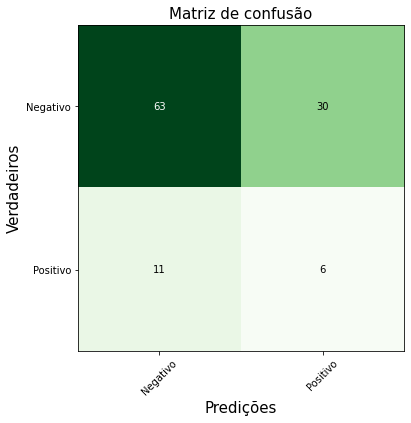

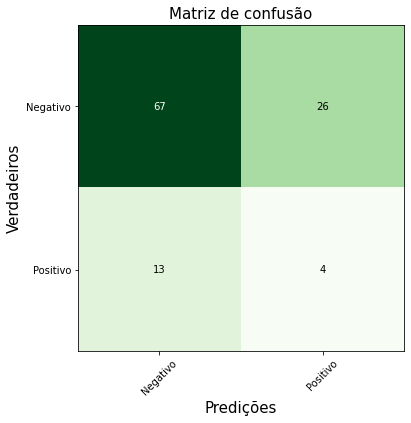

In [135]:
tratamento.confusion(y_true=y_test.astype(int),y_predict=y_pred_aft_p_o, fig_name='RNAPU')
tratamento.confusion(y_true=y_test.astype(int),y_predict=y_pred_aft_p_u, fig_name='RNAPO')

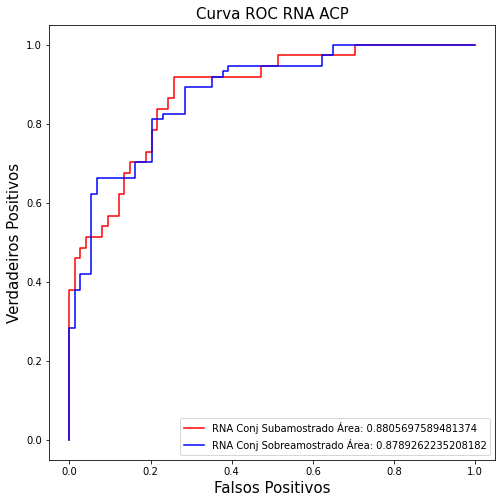

In [78]:
tratamento.plot_roc(tpr=[tpr_nn_p_u,tpr_nn_p_o]
,fpr = [fpr_nn_p_u,fpr_nn_p_o],
Names=["RNA Conj Subamostrado","RNA Conj Sobreamostrado"],auc=[auc_nn_p_u,auc_nn_p_o],
name_curve="ACP")

In [ ]:
svm_p_u = model_pca_u.SVM_GRID()
svm_p_o = model_pca_o.SVM_GRID()

In [ ]:
svm_p_u.best_estimator_.predict

<bound method BaseSVC.predict of SVC(C=0.1)>

In [ ]:
print(svm_p_o.best_estimator_)
print(svm_p_u.best_estimator_)

SVC(C=100, gamma=1)
SVC(C=0.1)


In [ ]:


print("SVM PCA UNDER")

print(sklearn.metrics.accuracy_score(y_true=y_test, y_pred=svm_p_o.best_estimator_.predict(X_test_p_u)))
print(sklearn.metrics.precision_score(y_true=y_test, y_pred=svm_p_o.best_estimator_.predict(X_test_p_u),pos_label='1'))
print(sklearn.metrics.recall_score(y_true=y_test, y_pred=svm_p_o.best_estimator_.predict(X_test_p_u),pos_label='1'))
print(sklearn.metrics.f1_score(y_true=y_test, y_pred=svm_p_o.best_estimator_.predict(X_test_p_u),pos_label='1'))

print("SVM PCA OVER")

print(sklearn.metrics.accuracy_score(y_true=y_test, y_pred=svm_p_o.best_estimator_.predict(X_test_p_o)))
print(sklearn.metrics.precision_score(y_true=y_test, y_pred=svm_p_o.best_estimator_.predict(X_test_p_o),pos_label='1'))
print(sklearn.metrics.recall_score(y_true=y_test, y_pred=svm_p_o.best_estimator_.predict(X_test_p_o),pos_label='1'))
print(sklearn.metrics.f1_score(y_true=y_test, y_pred=svm_p_o.best_estimator_.predict(X_test_p_o),pos_label='1'))

SVM PCA UNDER
0.6
0.2127659574468085
0.5882352941176471
0.3125
SVM PCA OVER
0.4909090909090909
0.15789473684210525
0.5294117647058824
0.24324324324324326


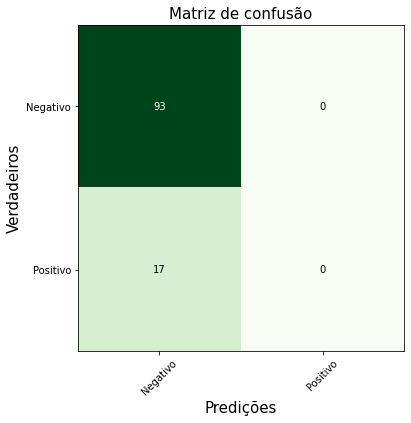

In [ ]:
tratamento.confusion(y_true=y_test,y_predict=svm_p_u.best_estimator_.predict(X_test_p_u),fig_name='SVM_P_U.png')

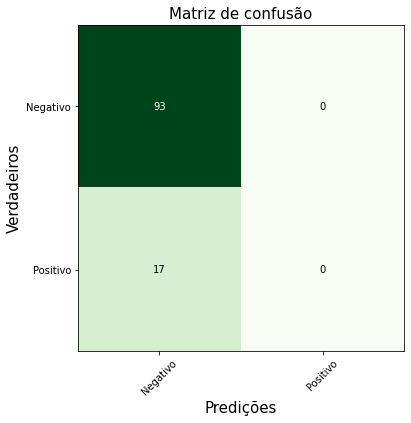

In [ ]:
tratamento.confusion(y_true=y_test,y_predict=svm_p_u.best_estimator_.predict(X_test_p_o),fig_name='SVM_P_O.png')